In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
raw_df = pd.read_csv('./data/raw/training.1600000.processed.noemoticon.csv', names=['polarity', 'id', 'date', 'flag','user', 'text'])

raw_df.head()

,polarity,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [40]:
# Transform target from numbers to labels
decode_map = {0: "negative", 2: "neutral", 4: "positive"}
def decode_sentiment(label):
    return decode_map[int(label)]

raw_df['polarity'] = raw_df['polarity'].apply(lambda x: decode_sentiment(x))

raw_df

,polarity,id,date,flag,user,text
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## Create definite dataframe

In [41]:
# Get only needed columns
df = raw_df[[ 'polarity', 'text' ]]
df

,polarity,text
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,is upset that he can't update his Facebook by ...
2,negative,@Kenichan I dived many times for the ball. Man...
3,negative,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,positive,Just woke up. Having no school is the best fee...
1599996,positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,positive,Happy 38th Birthday to my boo of alll time!!! ...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  object
 1   text      1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB


In [53]:
df.isnull().sum()

polarity    0
text        0
dtype: int64

## Plot polarity count

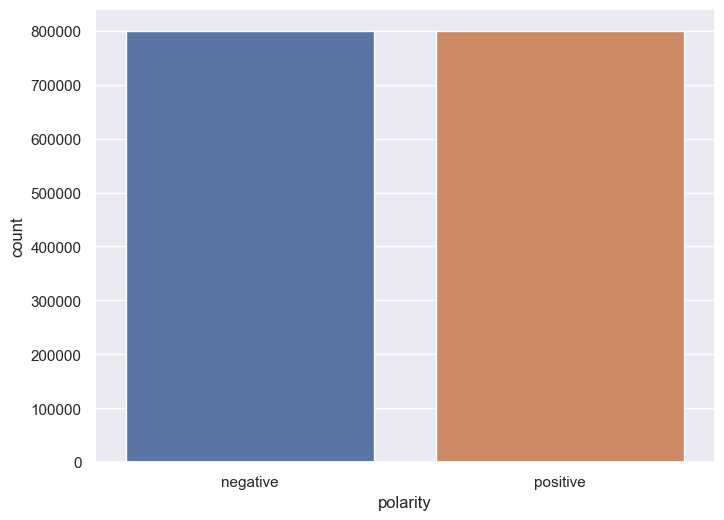

In [51]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(x='polarity', data=df)
plt.show()

## Save dataset

In [54]:
df.to_csv('./data/edited/data.csv')